In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm
import matplotlib
import rebound
import pandas as pn
import os

class Orbit:
    def __init__(self, JD, x, y, z, color):
        self.JD = JD
        self.x = x
        self.y = y
        self.z = z
        self.color = color

    def __repr__(self):
        return f"Date={self.JD}, Color={self.color})"

In [10]:
directory = "/media/rainbow/Swap/Swap/Thesis/Notable/Ephemerides/"

orbits = []
for file in os.listdir(directory):
    orbit_data = pn.read_csv(directory+file, delimiter=r"\s+", skiprows=1, names=["JD","x","y","z"], header=None)
    orbit = Orbit(orbit_data.JD, orbit_data.x, orbit_data.y, orbit_data.z, "lightgray")
    orbits.append(orbit)

orbits[1].x

0      1.751664
1      1.755479
2      1.759210
3      1.762857
4      1.766421
         ...   
726   -0.022706
727   -0.010021
728    0.002665
729    0.015351
730    0.028036
Name: x, Length: 731, dtype: float64

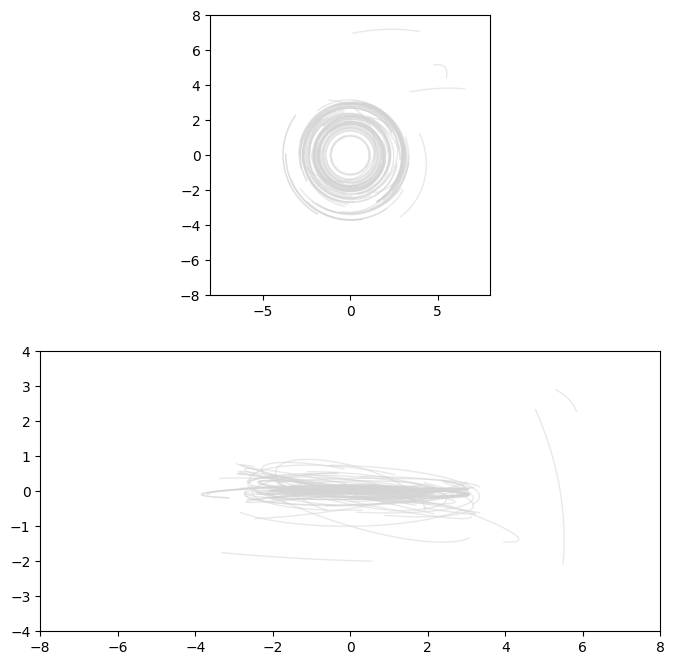

In [11]:
# Set up the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
ax1.set_aspect('equal')
ax1.set_xlim(-8, 8)
ax1.set_ylim(-8, 8)

ax2.set_aspect('auto')
ax2.set_xlim(-8, 8)
ax2.set_ylim(-4, 4)

for asteroid in orbits:
            ax1.plot(asteroid.x, asteroid.y, 'lightgray', linewidth=1, zorder=1, alpha=0.5)

for asteroid in orbits:
            ax2.plot(asteroid.x, asteroid.z, 'lightgray', linewidth=1, zorder=1, alpha=0.5)

In [15]:
n_objects = len(orbits)
cmap = matplotlib.colormaps.get_cmap('turbo')  # or try 'gist_ncar', 'nipy_spectral', 'turbo'
object_colors = {i: cmap(i / n_objects) for i in range(n_objects)}  # normalized

for i, orbit in enumerate(orbits):
    orbit.color = object_colors[i]

In [18]:
scat = ax1.scatter([orbit.x[1] for orbit in orbits],
                   [orbit.y[1] for orbit in orbits],
                   s = 1, zorder = 2, color=[orbit.color for orbit in orbits])
scat_xz = ax2.scatter([orbit.x[1] for orbit in orbits],
                      [orbit.z[1] for orbit in orbits],
                      s=1, zorder=2, color=[orbit.color for orbit in orbits])